## Heart Failure Prediction 

![](https://viewmedica.com/images/thumbslarge/heartfailure_1280.jpg)

source : https://www.wkhs.com/heart/conditions-treated/congestive-heart-failure

### Hi there!😄 I am new to data science and this is my try on the Heart Failure Prediction dataset. Feel free to comment if you have any questions, insights or advice on this or any data science related :) Upvote if you find my work useful for you! Thank you!

# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#split train and test set
from sklearn.model_selection import train_test_split

#sklearn model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# **<span style="color:#6daa9f;">LOAD DATA</span>**


In [2]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **<span style="color:#6daa9f;">EDA</span>**


In [3]:
#summary of variables in data
print(data.describe())

#identify column names,column data type and shape of the dataset
print(np.shape(data))

print(data.columns.tolist())

data.dtypes

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

From here,we can see that the dataset contains 13 columns with 299 rows.
The datatype for every rows are also all numerics 

Detail About Data:

- Age: age of patient
- anaemia :whether the patient have a low red blood cell or hemoglobin (0 or 1)
- creatinine_phosphokinase: an enzyme in our blood (the level of CPK enzyme in blood mcg/L),  
high level of CPK indicate that there has been an injury or stress to muscle tissue, heart or brain
- diabetes: if the patient has diabetes (type 2 diabetes patient is 4 times more likely  to develop heart failure than someone without)
- ejection_fraction : percentage of blood pump out of the heart at each contraction (percentage)
- high_blood_pressure: if the patient have hypertension
- plateletes:the level of platelets in blood 
- serum_creatinine: the level of serum creatinine in patient's blood mg/dL- 
  give an estimation on how well the kidney filters
- serum_sodium: level of serum sodium in the blood
- sex:gender of patient (0 or 1) female/male
- smoking : if the patient smokes or not
- time:follow up period of patient
- death_event:patient deceased during the follow up period


In [4]:
#identify missing values in dataset
data.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The sum of missing values for every column.In this case,there are zero missing values for all columns

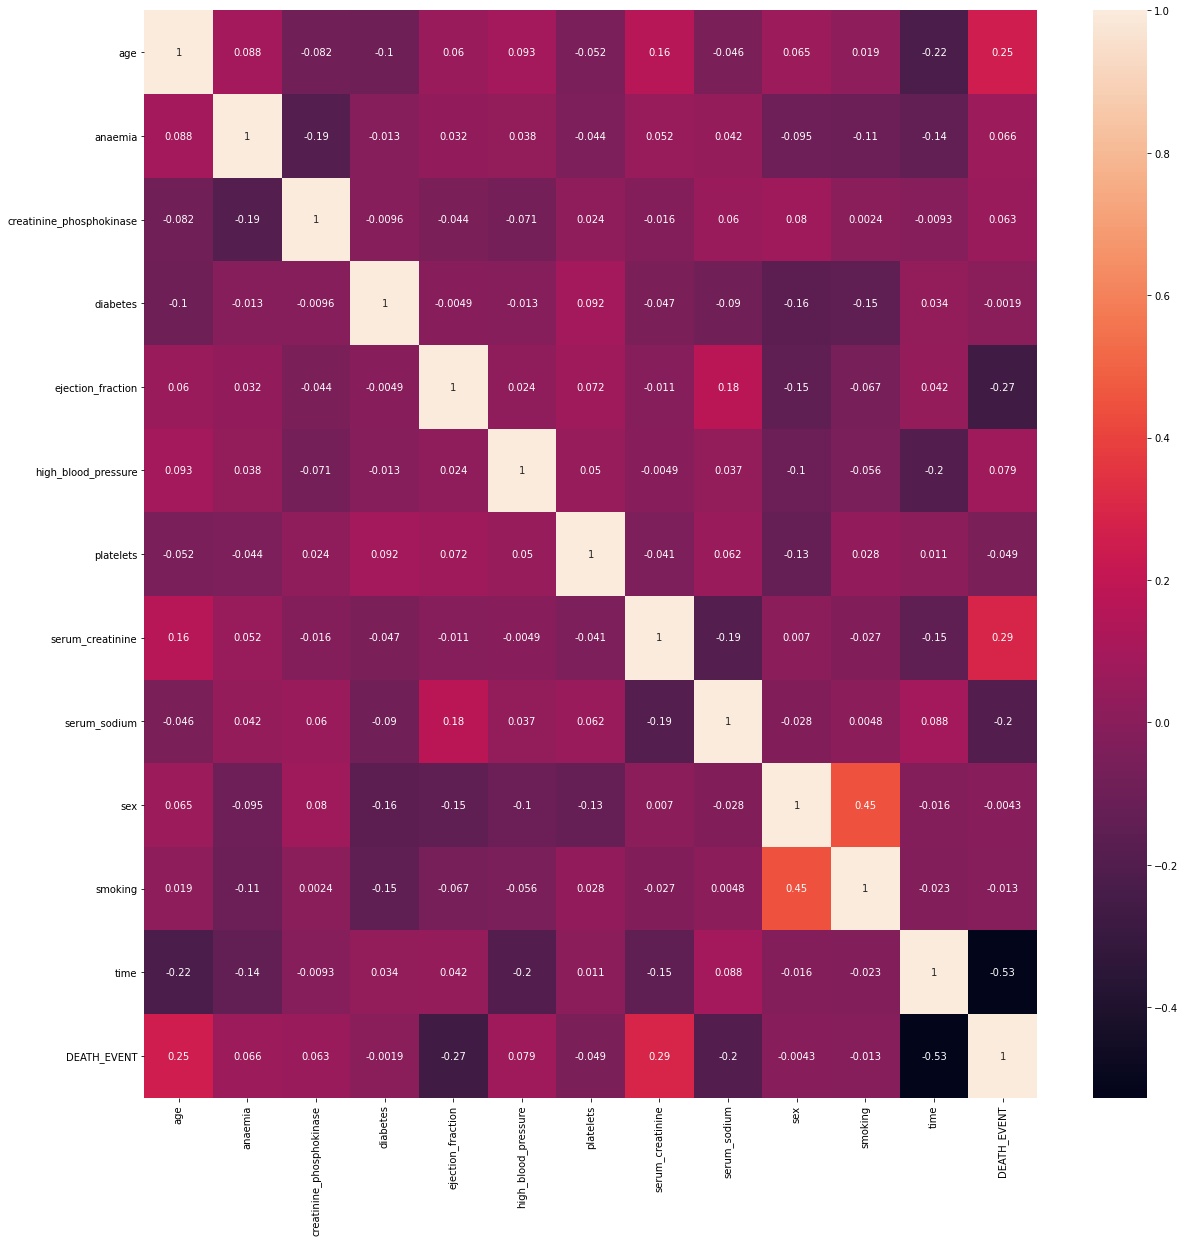

<Figure size 7200x7200 with 0 Axes>

In [5]:
corrMatrix = data.corr()
plt.subplots(figsize=(20,20))

sns.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(100,100))
plt.show()

Correlation between all features:
- follow up time of patient have the highest correlation with death_event 
- followed by ejection fraction
- linearly collerated age (higher age, more likely to death)
- serum_creatinine level linearly collerated with death_event

From the matrix, I decided to use age, time,ejection_fraction,serum_Creatinine and serum_Sodium


## Variable Analysis
Reference : https://towardsdatascience.com/data-exploration-and-analysis-using-python-e564473d7607

Using univariate analysis to highlight missing and outlier values.Our variable are categorical variables.

Handling outliers


### Data Analysis & Visualization

visualize every data 

Age 
-the number of death event according to age distribution




0    203
1     96
Name: DEATH_EVENT, dtype: int64


<AxesSubplot:>

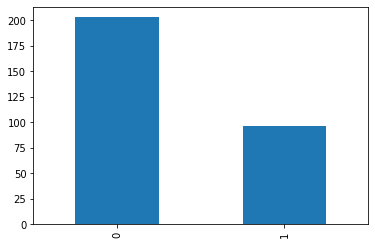

In [6]:
#check the data provided according to our target variable(death_event)

print(data['DEATH_EVENT'].value_counts())
data['DEATH_EVENT'].value_counts().plot(kind='bar')

Above clearly shows that our data is imbalanced with the data for '0' is 203 while for '1' is 96 samples.

<AxesSubplot:xlabel='age', ylabel='Count'>

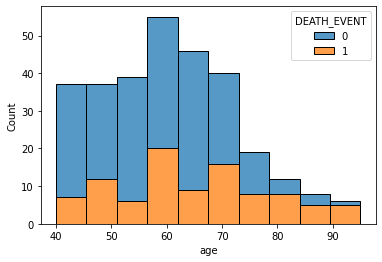

In [7]:
sns.histplot(data,x='age',hue='DEATH_EVENT',multiple='stack')


<AxesSubplot:xlabel='age', ylabel='Count'>

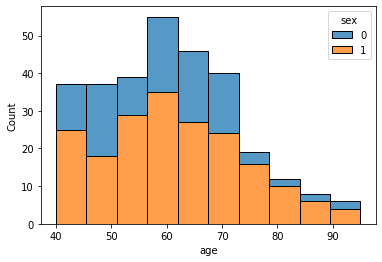

In [8]:
sns.histplot(data,x='age',hue='sex',multiple="stack")



- I will not get rid of outliers as these values are medical data which actually have meaning medically




## Model Building

**Split train and test data**



In [9]:
col = ['time','ejection_fraction','serum_creatinine','age','serum_sodium']
predictors = data[col]
target = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)



**Normalize our data**

Since we have many numerical columns in our data with different range of values, I decided to change the values to a common scale using normalization to bring it all in the same range.

In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 ## 5 MODEL
 
* Naive Bayes
* Random Forest
* Logistic Regression
* SVM
* Decision Trees


In [11]:
#gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
acc_naivebayes = metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):",acc_naivebayes )
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 78.78787878787878
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



[[40  2]
 [12 12]]
Logistic Regression model Accuracy :  78.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.86      0.50      0.63        24

    accuracy                           0.79        66
   macro avg       0.81      0.73      0.74        66
weighted avg       0.80      0.79      0.77        66



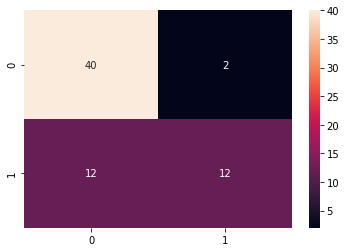

In [12]:
#logistic regression 

classifier = LogisticRegression(random_state = 22)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

acc_logisticregression = round(accuracy_score(y_pred, y_test) * 100, 2)
print ("Logistic Regression model Accuracy : ", acc_logisticregression) 
print(classification_report(y_test, y_pred))

In [13]:
#random forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Random Forest Model Accuracy : ",acc_randomforest)
print(classification_report(y_test, y_pred))

Random Forest Model Accuracy :  84.85
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        42
           1       0.94      0.62      0.75        24

    accuracy                           0.85        66
   macro avg       0.88      0.80      0.82        66
weighted avg       0.86      0.85      0.84        66



In [14]:
#SVM Classifier

from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

acc_SVM = round(accuracy_score(y_pred, y_test) * 100, 2)
print("SVM Model Accuracy : ",acc_SVM)
print(classification_report(y_test, y_pred))

SVM Model Accuracy :  77.27
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        42
           1       0.80      0.50      0.62        24

    accuracy                           0.77        66
   macro avg       0.78      0.71      0.73        66
weighted avg       0.78      0.77      0.76        66



In [15]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

# fit the model with the training data
modeldt.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', modeldt.get_depth())

# predict the target on the train dataset
predict_train = modeldt.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test*100)
print(classification_report(y_test, y_pred))

Depth of the Decision Tree : 10
accuracy_score on train dataset :  1.0
accuracy_score on test dataset :  84.84848484848484
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        42
           1       0.80      0.50      0.62        24

    accuracy                           0.77        66
   macro avg       0.78      0.71      0.73        66
weighted avg       0.78      0.77      0.76        66

